In [0]:
# Clone Lucid library 
!git clone https://github.com/totti0223/lucid4keras.git

Cloning into 'lucid4keras'...
remote: Enumerating objects: 106, done.
remote: Total 106 (delta 0), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (106/106), 7.03 MiB | 4.92 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [0]:
# Configure path 
import os
os.chdir('/content/lucid4keras/lucid4keras')

In [0]:
# Mount Drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import necessary libraries
import os
import keras.backend as K
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.models import load_model, Model
from keras.layers import *

import lucid.optvis.param as param
import lucid.optvis.transform as transform

# Note: Remove ' . ' from render.py import statements 
from utils import prepare_model
from render import keras_render_vis
import objectives as keras_objectives
# from lucid4keras import prepare_model

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random

In [0]:
K.clear_session()
# Now there is the option to use: 
# 1. ImageNet weights
# 2. Trained model weights (trained on plant data)
# Both methods are included in this example

In [0]:
model_v3 = InceptionV3() # 1. Use ImageNet weights

In [0]:
# Upload InceptionV3 weights! Located at: 
# from keras.models import load_model
# model_v3 = load_model('/content/drive/My Drive/Colab Notebooks/toda_okura_inceptionv3_test.h5')
# model_v3 = load_model('/content/drive/My Drive/Colab Notebooks/inceptionv3_plantvillage.hdf5')
# model_v3 = load_model('/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_1.h5')
# model_v3 = load_model('/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small_hprc.h5')
# os.listdir('/content/gdrive/My Drive/Colab Notebooks/toda_okura_inceptionv3.h5')

In [0]:
# 2. Use trained model weights (trained on plant data)
base_model = InceptionV3(include_top=False, weights=None, input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(38,name='prepredictions')(x)
predictions = Activation('softmax',name='predictions')(x)
model_v3 = Model(inputs=base_model.input, outputs=predictions)
model_v3.load_weights("/content/drive/My Drive/Colab Notebooks/inceptionv3_plantvillage.hdf5") # Edit directory path as needed

In [0]:
model_v3.summary() # Obtain layer names and number of channels from model summary 

mixed10 <keras.layers.merge.Concatenate object at 0x7f95985e0da0> is a merge layer. will linearize connected relu containing layers
already a linear layer
already a linear layer
already a linear layer
already a linear layer
already a linear layer
already a linear layer
512 5.303194



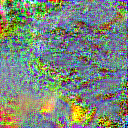

In [0]:
# Testing Lucid library 
model = prepare_model(model_v3, layer_name="mixed10")
img = keras_render_vis(model, 40) # Ensure (Conv) layer has enough channels! 

Layer:  conv2d_283
already a linear layer, return unmodified model
Channel:  25
512 17.39821



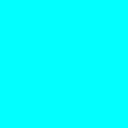

Channel:  31
512 1.8691136



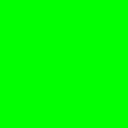

Channel:  22
512 19.3038



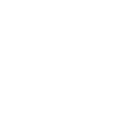

Channel:  26
512 18.666449



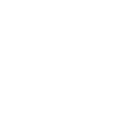

Layer:  conv2d_285
already a linear layer, return unmodified model
Channel:  25
512 96.94579



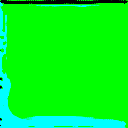

Channel:  50
512 26.90996



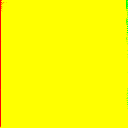

Channel:  26
512 1.6313338



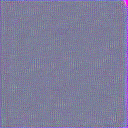

Channel:  55
512 16.911406



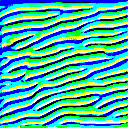

Layer:  conv2d_287
already a linear layer, return unmodified model
Channel:  52
512 57.96324



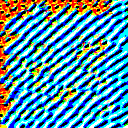

Channel:  99
512 584.3251



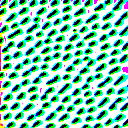

Channel:  127
512 166.81699



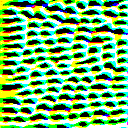

Channel:  48
512 272.9803



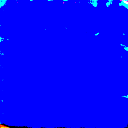

Layer:  mixed0
mixed0 <keras.layers.merge.Concatenate object at 0x7f9599bdcba8> is a merge layer. will linearize connected relu containing layers
already a linear layer
already a linear layer
already a linear layer
already a linear layer
Channel:  14
512 432.30334



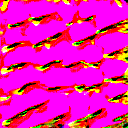

Channel:  60
512 35.99794



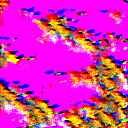

Channel:  218
512 4.1605124



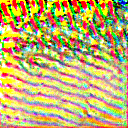

Channel:  73
512 44.52644



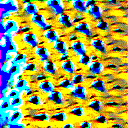

Layer:  mixed2
mixed2 <keras.layers.merge.Concatenate object at 0x7f9599820f28> is a merge layer. will linearize connected relu containing layers
	linearizing layer: activation_302
	linearizing layer: activation_304
	linearizing layer: activation_307
	linearizing layer: activation_308
Channel:  116
512 2981.462



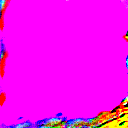

Channel:  96
512 1114.4902



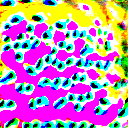

Channel:  45
512 1700.7385



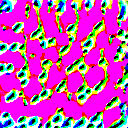

Channel:  179
512 77.71421



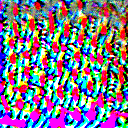

Layer:  mixed4
mixed4 <keras.layers.merge.Concatenate object at 0x7f9599462ef0> is a merge layer. will linearize connected relu containing layers
	linearizing layer: activation_313
	linearizing layer: activation_316
	linearizing layer: activation_321
	linearizing layer: activation_322
Channel:  463
512 923.21466



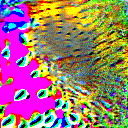

Channel:  465
512 491.17297



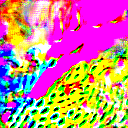

Channel:  111
512 21.428066



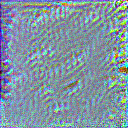

Channel:  36
512 78.45975



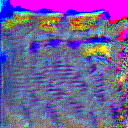

Layer:  mixed6
mixed6 <keras.layers.merge.Concatenate object at 0x7f9598ebbf28> is a merge layer. will linearize connected relu containing layers
	linearizing layer: activation_333
	linearizing layer: activation_336
	linearizing layer: activation_341
	linearizing layer: activation_342
Channel:  366
512 5866.04



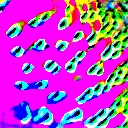

Channel:  590
512 22.203112



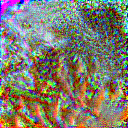

Channel:  223
512 24.205881



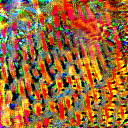

Channel:  712
512 4412.709



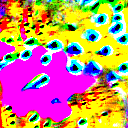

Layer:  mixed10
mixed10 <keras.layers.merge.Concatenate object at 0x7f95985e0da0> is a merge layer. will linearize connected relu containing layers
already a linear layer
already a linear layer
already a linear layer
already a linear layer
already a linear layer
already a linear layer
Channel:  47
512 545.40625



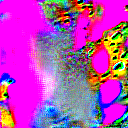

Channel:  188
512 1011.24097



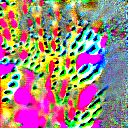

Channel:  897
512 -1.2074724



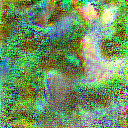

Channel:  390
512 5438.671



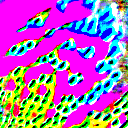

In [0]:
# Obtain 4 images per specified layer 
import random

# Note: Layer names and channel numbers are obtained from model.summary()

layer_names = ["conv2d_283", "conv2d_285", "conv2d_287", "mixed0", "mixed2", "mixed4", "mixed6", "mixed10"]
channels_per_layer = [32, 64, 192, 256, 288, 768, 768, 2048]
# layer_names = ["conv2d_1", "conv2d_3", "conv2d_5", "mixed0", "mixed2", "mixed4", "mixed6", "mixed10"]

for (i, name) in enumerate(layer_names): # Iterate over all layers of interest
  
  print("Layer: ", name)
  model = prepare_model(model_v3, layer_name=name) # Prepare model at that layer
  
  random_channel_list = []
  for j in range(0, 4): # Get 4 random channel activations

    # Don't want duplicate channels 
    random_channel = random.randrange(0, channels_per_layer[i], 1)
    while(random_channel in random_channel_list): # Keep iterating until unique random number
      random_channel = random.randrange(0, channels_per_layer[i], 1)
    random_channel_list.append(random_channel)
    
    print("Channel: ", random_channel)
    img = keras_render_vis(model, random_channel) # Activate neuron & display image